<a href="https://colab.research.google.com/github/AvaneSauhard/HumanActivityRecognition/blob/main/Human_Activity_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import sklearn.metrics as mt
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier

from tensorflow.keras.layers import LSTM

In [ ]:
#Reading data:

df = pd.read_csv("/content/drive/MyDrive/kU HAR/KU-HAR_time_20750x300_fft.csv",header=None)
dff = df.values
signals = dff[:, 0: 1800]                         #These are the time-domian subsamples (signals) 
signals = np.array(signals, dtype=np.float32)
labels = dff[:, 1800]                             #These are their associated class labels (signals)

print(signals.shape)
print(labels.shape)

(20750, 1800)
(20750,)


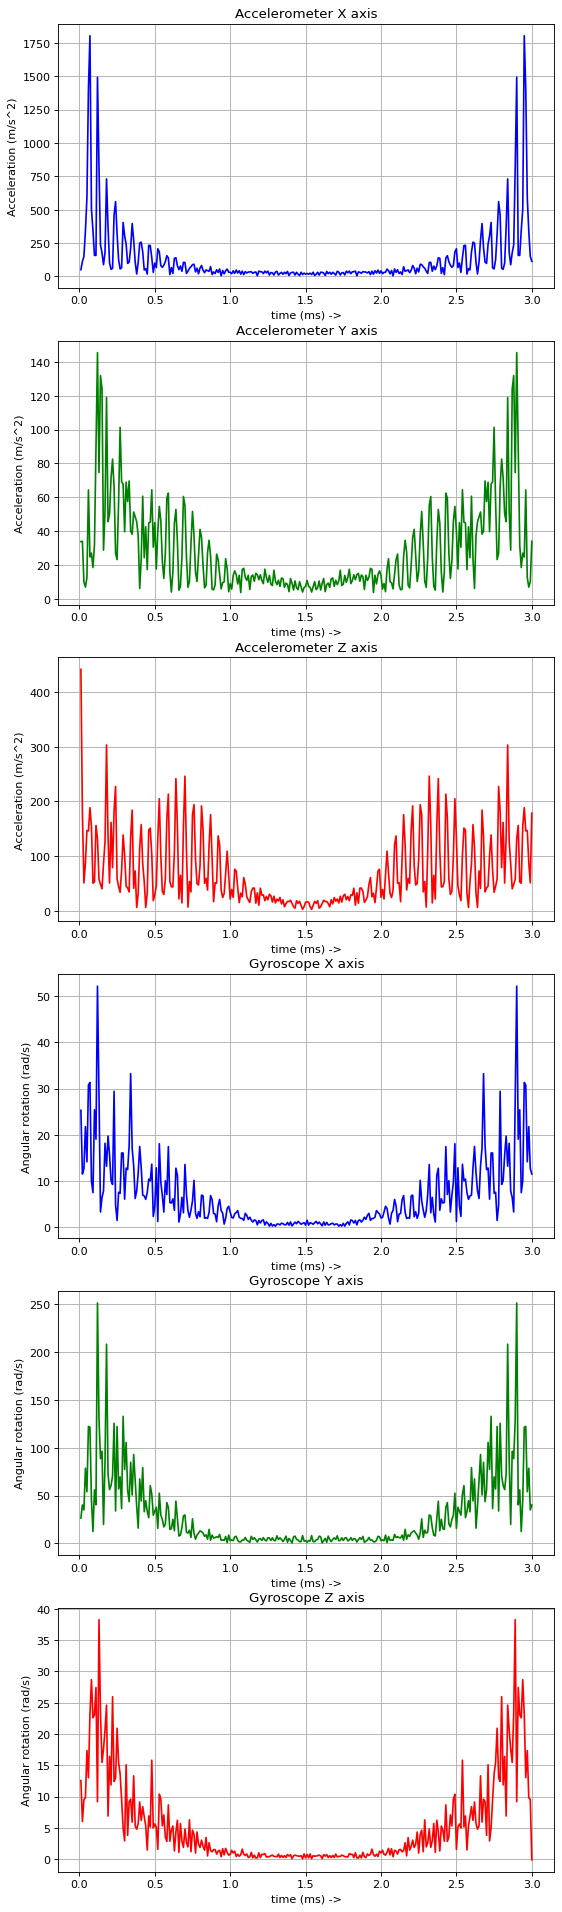

In [ ]:
# Visualization of the 20001th (time-domain HAR) sample (channel data):
# The correspondig activity is "Jump"

Accelerometer_X_axis_data = signals[20000, 0: 300]
Accelerometer_Y_axis_data = signals[20000, 300: 600]
Accelerometer_Z_axis_data = signals[20000, 600: 900]
Gyroscope_X_axis_data = signals[20000, 900: 1200]
Gyroscope_Y_axis_data = signals[20000, 1200: 1500]
Gyroscope_Z_axis_data = signals[20000, 1500: 1800]
time = np.linspace(.01, 3, 300)


figure(figsize=(8, 30), dpi=80)

ax1 = plt.subplot(611)
ax1.plot(time, Accelerometer_X_axis_data, 'b')
ax1.title.set_text('Accelerometer X axis')
ax1.set_xlabel('time (ms) ->')
ax1.set_ylabel('Acceleration (m/s^2)')
ax1.grid(True)

ax2 = plt.subplot(612)
ax2.plot(time, Accelerometer_Y_axis_data, 'g')
ax2.title.set_text('Accelerometer Y axis')
ax2.set_xlabel('time (ms) ->')
ax2.set_ylabel('Acceleration (m/s^2)')
ax2.grid(True)

ax3 = plt.subplot(613)
ax3.plot(time, Accelerometer_Z_axis_data, 'r')
ax3.title.set_text('Accelerometer Z axis')
ax3.set_xlabel('time (ms) ->')
ax3.set_ylabel('Acceleration (m/s^2)')
ax3.grid(True)

ax4 = plt.subplot(614)
ax4.plot(time, Gyroscope_X_axis_data, 'b')
ax4.title.set_text('Gyroscope X axis')
ax4.set_xlabel('time (ms) ->')
ax4.set_ylabel('Angular rotation (rad/s)')
ax4.grid(True)

ax5 = plt.subplot(615)
ax5.plot(time, Gyroscope_Y_axis_data, 'g')
ax5.title.set_text('Gyroscope Y axis')
ax5.set_xlabel('time (ms) ->')
ax5.set_ylabel('Angular rotation (rad/s)')
ax5.grid(True)

ax6 = plt.subplot(616)
ax6.plot(time, Gyroscope_Z_axis_data, 'r')
ax6.title.set_text('Gyroscope Z axis')
ax6.set_xlabel('time (ms) ->')
ax6.set_ylabel('Angular rotation (rad/s)')
ax6.grid(True)

plt.show()

In [ ]:
print(Accelerometer_X_axis_data.shape)

(300,)


In [ ]:
Accelerometer_zandu_axis_data = signals[:, 0: 300]
print(Accelerometer_zandu_axis_data.shape)


(20750, 300)


In [ ]:
signals

array([[ 6.0586e+00,  2.7350e-01,  1.1793e+00, ...,  4.1792e-01,
         6.5471e-01, -1.3097e-02],
       [ 5.2931e+00,  2.6016e-01,  5.9321e-01, ...,  2.9865e-01,
         2.1501e-01, -4.3542e-03],
       [ 4.8327e+00,  6.6665e-01,  4.7773e-01, ...,  4.6745e-01,
         3.0119e-01,  8.4980e-04],
       ...,
       [ 3.3034e+02,  7.3298e+01,  4.2686e+02, ...,  2.9041e+01,
         1.0450e+02,  2.3955e-02],
       [ 1.9707e+02,  1.8901e+02,  2.4058e+02, ...,  2.1725e+01,
         6.1863e+01, -1.8732e-01],
       [ 2.3065e+02,  1.6268e+02,  2.1375e+02, ...,  4.3833e+01,
         5.5649e+01,  1.4051e-01]], dtype=float32)

In [ ]:

Accelerometer_zandu_axis_data

array([[6.0586e+00, 2.7350e-01, 1.1793e+00, ..., 5.3552e-01, 1.1793e+00,
        2.7350e-01],
       [5.2931e+00, 2.6016e-01, 5.9321e-01, ..., 1.6823e-01, 5.9321e-01,
        2.6016e-01],
       [4.8327e+00, 6.6665e-01, 4.7773e-01, ..., 6.0367e-01, 4.7773e-01,
        6.6665e-01],
       ...,
       [3.3034e+02, 7.3298e+01, 4.2686e+02, ..., 1.3013e+02, 4.2686e+02,
        7.3298e+01],
       [1.9707e+02, 1.8901e+02, 2.4058e+02, ..., 5.7433e+01, 2.4058e+02,
        1.8901e+02],
       [2.3065e+02, 1.6268e+02, 2.1375e+02, ..., 1.2378e+02, 2.1375e+02,
        1.6268e+02]], dtype=float32)

In [ ]:
Accelerometer_X_axis_data = signals[:, 0: 300]
Accelerometer_Y_axis_data = signals[:, 300: 600]
Accelerometer_Z_axis_data = signals[:, 600: 900]
Gyroscope_X_axis_data = signals[:, 900: 1200]
Gyroscope_Y_axis_data = signals[:, 1200: 1500]
Gyroscope_Z_axis_data = signals[:, 1500: 1800]
#id = signals[:,1800]

In [ ]:
signals[:,301]

array([ 2.5913 ,  0.5418 ,  0.43665, ..., 27.906  , 49.331  , 19.778  ],
      dtype=float32)

In [ ]:
Accelerometer_X_axis_data[:,299]

array([  0.2735 ,   0.26016,   0.66665, ...,  73.298  , 189.01   ,
       162.68   ], dtype=float32)

In [ ]:
labels

array([0., 0., 0., ..., 9., 9., 9.])

In [ ]:
Accelerometer_X_axis_data = pd.DataFrame(Accelerometer_X_axis_data)
Accelerometer_Y_axis_data = pd.DataFrame(Accelerometer_Y_axis_data)
Accelerometer_Z_axis_data = pd.DataFrame(Accelerometer_Z_axis_data)

Gyroscope_X_axis_data = pd.DataFrame(Gyroscope_X_axis_data)
Gyroscope_Y_axis_data= pd.DataFrame(Gyroscope_Y_axis_data)
Gyroscope_Z_axis_data = pd.DataFrame(Gyroscope_Z_axis_data)

labels=pd.DataFrame(labels)

Accelerometer_X_axis_data = pd.concat([Accelerometer_X_axis_data, labels], axis=1, ignore_index = True)
Accelerometer_Y_axis_data = pd.concat([Accelerometer_Y_axis_data, labels], axis=1, ignore_index = True)
Accelerometer_Z_axis_data = pd.concat([Accelerometer_Z_axis_data, labels], axis=1, ignore_index = True)

Gyroscope_X_axis_data = pd.concat([Gyroscope_X_axis_data, labels], axis=1, ignore_index = True)
Gyroscope_Y_axis_data = pd.concat([Gyroscope_Y_axis_data, labels], axis=1, ignore_index = True)
Gyroscope_Z_axis_data = pd.concat([Gyroscope_Z_axis_data, labels], axis=1, ignore_index = True)

Accelerometer_X_axis_data.shape

(20750, 301)

In [ ]:
Accelerometer_X_axis_data.shape

(20750, 301)

In [ ]:
Accelerometer_X_axis_data_0 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==0]
Accelerometer_X_axis_data_1 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==1]
Accelerometer_X_axis_data_2 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==2]
Accelerometer_X_axis_data_3 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==3]
Accelerometer_X_axis_data_4 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==4]
Accelerometer_X_axis_data_5 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==5]
Accelerometer_X_axis_data_6 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==6]
Accelerometer_X_axis_data_7 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==7]
Accelerometer_X_axis_data_8 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==8]
Accelerometer_X_axis_data_9 = Accelerometer_X_axis_data[Accelerometer_X_axis_data[300]==9]

Accelerometer_Y_axis_data_0 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==0]
Accelerometer_Y_axis_data_1 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==1]
Accelerometer_Y_axis_data_2 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==2]
Accelerometer_Y_axis_data_3 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==3]
Accelerometer_Y_axis_data_4 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==4]
Accelerometer_Y_axis_data_5 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==5]
Accelerometer_Y_axis_data_6 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==6]
Accelerometer_Y_axis_data_7 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==7]
Accelerometer_Y_axis_data_8 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==8]
Accelerometer_Y_axis_data_9 = Accelerometer_Y_axis_data[Accelerometer_Y_axis_data[300]==9]

Accelerometer_Z_axis_data_0 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==0]
Accelerometer_Z_axis_data_1 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==1]
Accelerometer_Z_axis_data_2 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==2]
Accelerometer_Z_axis_data_3 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==3]
Accelerometer_Z_axis_data_4 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==4]
Accelerometer_Z_axis_data_5 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==5]
Accelerometer_Z_axis_data_6 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==6]
Accelerometer_Z_axis_data_7 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==7]
Accelerometer_Z_axis_data_8 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==8]
Accelerometer_Z_axis_data_9 = Accelerometer_Z_axis_data[Accelerometer_Z_axis_data[300]==9]


Gyroscope_X_axis_data_0 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==0]
Gyroscope_X_axis_data_1 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==1]
Gyroscope_X_axis_data_2 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==2]
Gyroscope_X_axis_data_3 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==3]
Gyroscope_X_axis_data_4 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==4]
Gyroscope_X_axis_data_5 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==5]
Gyroscope_X_axis_data_6 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==6]
Gyroscope_X_axis_data_7 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==7]
Gyroscope_X_axis_data_8 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==8]
Gyroscope_X_axis_data_9 = Gyroscope_X_axis_data[Gyroscope_X_axis_data[300]==9]

Gyroscope_Y_axis_data_0 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==0]
Gyroscope_Y_axis_data_1 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==1]
Gyroscope_Y_axis_data_2 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==2]
Gyroscope_Y_axis_data_3 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==3]
Gyroscope_Y_axis_data_4 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==4]
Gyroscope_Y_axis_data_5 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==5]
Gyroscope_Y_axis_data_6 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==6]
Gyroscope_Y_axis_data_7 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==7]
Gyroscope_Y_axis_data_8 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==8]
Gyroscope_Y_axis_data_9 = Gyroscope_Y_axis_data[Gyroscope_Y_axis_data[300]==9]

Gyroscope_Z_axis_data_0 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==0]
Gyroscope_Z_axis_data_1 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==1]
Gyroscope_Z_axis_data_2 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==2]
Gyroscope_Z_axis_data_3 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==3]
Gyroscope_Z_axis_data_4 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==4]
Gyroscope_Z_axis_data_5 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==5]
Gyroscope_Z_axis_data_6 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==6]
Gyroscope_Z_axis_data_7 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==7]
Gyroscope_Z_axis_data_8 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==8]
Gyroscope_Z_axis_data_9 = Gyroscope_Z_axis_data[Gyroscope_Z_axis_data[300]==9]

In [ ]:
from sklearn.model_selection import train_test_split
Accelerometer_X_axis_data_train_0, Accelerometer_X_axis_data_test_0 = train_test_split(Accelerometer_X_axis_data_0, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_0, Accelerometer_Y_axis_data_test_0 = train_test_split(Accelerometer_Y_axis_data_0, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_0, Accelerometer_Z_axis_data_test_0 = train_test_split(Accelerometer_Z_axis_data_0, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_1, Accelerometer_X_axis_data_test_1 = train_test_split(Accelerometer_X_axis_data_1, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_1, Accelerometer_Y_axis_data_test_1 = train_test_split(Accelerometer_Y_axis_data_1, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_1, Accelerometer_Z_axis_data_test_1 = train_test_split(Accelerometer_Z_axis_data_1, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_2, Accelerometer_X_axis_data_test_2 = train_test_split(Accelerometer_X_axis_data_2, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_2, Accelerometer_Y_axis_data_test_2 = train_test_split(Accelerometer_Y_axis_data_2, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_2, Accelerometer_Z_axis_data_test_2 = train_test_split(Accelerometer_Z_axis_data_2, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_3, Accelerometer_X_axis_data_test_3 = train_test_split(Accelerometer_X_axis_data_3, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_3, Accelerometer_Y_axis_data_test_3 = train_test_split(Accelerometer_Y_axis_data_3, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_3, Accelerometer_Z_axis_data_test_3 = train_test_split(Accelerometer_Z_axis_data_3, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_4, Accelerometer_X_axis_data_test_4 = train_test_split(Accelerometer_X_axis_data_4, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_4, Accelerometer_Y_axis_data_test_4 = train_test_split(Accelerometer_Y_axis_data_4, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_4, Accelerometer_Z_axis_data_test_4 = train_test_split(Accelerometer_Z_axis_data_4, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_5, Accelerometer_X_axis_data_test_5 = train_test_split(Accelerometer_X_axis_data_5, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_5, Accelerometer_Y_axis_data_test_5 = train_test_split(Accelerometer_Y_axis_data_5, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_5, Accelerometer_Z_axis_data_test_5 = train_test_split(Accelerometer_Z_axis_data_5, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_6, Accelerometer_X_axis_data_test_6 = train_test_split(Accelerometer_X_axis_data_6, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_6, Accelerometer_Y_axis_data_test_6 = train_test_split(Accelerometer_Y_axis_data_6, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_6, Accelerometer_Z_axis_data_test_6 = train_test_split(Accelerometer_Z_axis_data_6, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_7, Accelerometer_X_axis_data_test_7 = train_test_split(Accelerometer_X_axis_data_7, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_7, Accelerometer_Y_axis_data_test_7 = train_test_split(Accelerometer_Y_axis_data_7, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_7, Accelerometer_Z_axis_data_test_7 = train_test_split(Accelerometer_Z_axis_data_7, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_8, Accelerometer_X_axis_data_test_8 = train_test_split(Accelerometer_X_axis_data_8, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_8, Accelerometer_Y_axis_data_test_8 = train_test_split(Accelerometer_Y_axis_data_8, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_8, Accelerometer_Z_axis_data_test_8 = train_test_split(Accelerometer_Z_axis_data_8, random_state=42, shuffle= True)

Accelerometer_X_axis_data_train_9, Accelerometer_X_axis_data_test_9 = train_test_split(Accelerometer_X_axis_data_9, random_state=42, shuffle= True)
Accelerometer_Y_axis_data_train_9, Accelerometer_Y_axis_data_test_9 = train_test_split(Accelerometer_Y_axis_data_9, random_state=42, shuffle= True)
Accelerometer_Z_axis_data_train_9, Accelerometer_Z_axis_data_test_9 = train_test_split(Accelerometer_Z_axis_data_9, random_state=42, shuffle= True)

In [ ]:
Gyroscope_X_axis_data_train_0, Gyroscope_X_axis_data_test_0 = train_test_split(Gyroscope_X_axis_data_0, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_0, Gyroscope_Y_axis_data_test_0 = train_test_split(Gyroscope_Y_axis_data_0, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_0, Gyroscope_Z_axis_data_test_0 = train_test_split(Gyroscope_Z_axis_data_0, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_1, Gyroscope_X_axis_data_test_1 = train_test_split(Gyroscope_X_axis_data_1, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_1, Gyroscope_Y_axis_data_test_1 = train_test_split(Gyroscope_Y_axis_data_1, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_1, Gyroscope_Z_axis_data_test_1 = train_test_split(Gyroscope_Z_axis_data_1, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_2, Gyroscope_X_axis_data_test_2 = train_test_split(Gyroscope_X_axis_data_2, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_2, Gyroscope_Y_axis_data_test_2 = train_test_split(Gyroscope_Y_axis_data_2, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_2, Gyroscope_Z_axis_data_test_2 = train_test_split(Gyroscope_Z_axis_data_2, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_3, Gyroscope_X_axis_data_test_3 = train_test_split(Gyroscope_X_axis_data_3, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_3, Gyroscope_Y_axis_data_test_3 = train_test_split(Gyroscope_Y_axis_data_3, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_3, Gyroscope_Z_axis_data_test_3 = train_test_split(Gyroscope_Z_axis_data_3, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_4, Gyroscope_X_axis_data_test_4 = train_test_split(Gyroscope_X_axis_data_4, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_4, Gyroscope_Y_axis_data_test_4 = train_test_split(Gyroscope_Y_axis_data_4, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_4, Gyroscope_Z_axis_data_test_4 = train_test_split(Gyroscope_Z_axis_data_4, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_5, Gyroscope_X_axis_data_test_5 = train_test_split(Gyroscope_X_axis_data_5, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_5, Gyroscope_Y_axis_data_test_5 = train_test_split(Gyroscope_Y_axis_data_5, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_5, Gyroscope_Z_axis_data_test_5 = train_test_split(Gyroscope_Z_axis_data_5, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_6, Gyroscope_X_axis_data_test_6 = train_test_split(Gyroscope_X_axis_data_6, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_6, Gyroscope_Y_axis_data_test_6 = train_test_split(Gyroscope_Y_axis_data_6, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_6, Gyroscope_Z_axis_data_test_6 = train_test_split(Gyroscope_Z_axis_data_6, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_7, Gyroscope_X_axis_data_test_7 = train_test_split(Gyroscope_X_axis_data_7, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_7, Gyroscope_Y_axis_data_test_7 = train_test_split(Gyroscope_Y_axis_data_7, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_7, Gyroscope_Z_axis_data_test_7 = train_test_split(Gyroscope_Z_axis_data_7, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_8, Gyroscope_X_axis_data_test_8 = train_test_split(Gyroscope_X_axis_data_8, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_8, Gyroscope_Y_axis_data_test_8 = train_test_split(Gyroscope_Y_axis_data_8, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_8, Gyroscope_Z_axis_data_test_8 = train_test_split(Gyroscope_Z_axis_data_8, random_state=42, shuffle= True)

Gyroscope_X_axis_data_train_9, Gyroscope_X_axis_data_test_9 = train_test_split(Gyroscope_X_axis_data_9, random_state=42, shuffle= True)
Gyroscope_Y_axis_data_train_9, Gyroscope_Y_axis_data_test_9 = train_test_split(Gyroscope_Y_axis_data_9, random_state=42, shuffle= True)
Gyroscope_Z_axis_data_train_9, Gyroscope_Z_axis_data_test_9 = train_test_split(Gyroscope_Z_axis_data_9, random_state=42, shuffle= True)

In [ ]:
Accelerometer_X_axis_data_train = pd.concat([Accelerometer_X_axis_data_train_0, Accelerometer_X_axis_data_train_1, Accelerometer_X_axis_data_train_2, Accelerometer_X_axis_data_train_3, Accelerometer_X_axis_data_train_4, Accelerometer_X_axis_data_train_5, Accelerometer_X_axis_data_train_6, Accelerometer_X_axis_data_train_7, Accelerometer_X_axis_data_train_8,  Accelerometer_X_axis_data_train_9], axis=0, sort= False, ignore_index= True)
Accelerometer_Y_axis_data_train = pd.concat([Accelerometer_Y_axis_data_train_0, Accelerometer_Y_axis_data_train_1, Accelerometer_Y_axis_data_train_2, Accelerometer_Y_axis_data_train_3, Accelerometer_Y_axis_data_train_4, Accelerometer_Y_axis_data_train_5, Accelerometer_Y_axis_data_train_6, Accelerometer_Y_axis_data_train_7, Accelerometer_Y_axis_data_train_8,  Accelerometer_Y_axis_data_train_9], axis=0, sort= False, ignore_index= True)
Accelerometer_Z_axis_data_train = pd.concat([Accelerometer_Z_axis_data_train_0, Accelerometer_Z_axis_data_train_1, Accelerometer_Z_axis_data_train_2, Accelerometer_Z_axis_data_train_3, Accelerometer_Z_axis_data_train_4, Accelerometer_Z_axis_data_train_5, Accelerometer_Z_axis_data_train_6, Accelerometer_Z_axis_data_train_7, Accelerometer_Z_axis_data_train_8,  Accelerometer_Z_axis_data_train_9], axis=0, sort= False, ignore_index= True)

Gyroscope_X_axis_data_train = pd.concat([Gyroscope_X_axis_data_train_0, Gyroscope_X_axis_data_train_1, Gyroscope_X_axis_data_train_2, Gyroscope_X_axis_data_train_3, Gyroscope_X_axis_data_train_4, Gyroscope_X_axis_data_train_5, Gyroscope_X_axis_data_train_6, Gyroscope_X_axis_data_train_7, Gyroscope_X_axis_data_train_8,  Gyroscope_X_axis_data_train_9], axis=0, sort= False, ignore_index= True)
Gyroscope_Y_axis_data_train = pd.concat([Gyroscope_Y_axis_data_train_0, Gyroscope_Y_axis_data_train_1, Gyroscope_Y_axis_data_train_2, Gyroscope_Y_axis_data_train_3, Gyroscope_Y_axis_data_train_4, Gyroscope_Y_axis_data_train_5, Gyroscope_Y_axis_data_train_6, Gyroscope_Y_axis_data_train_7, Gyroscope_Y_axis_data_train_8,  Gyroscope_Y_axis_data_train_9], axis=0, sort= False, ignore_index= True)
Gyroscope_Z_axis_data_train = pd.concat([Gyroscope_Z_axis_data_train_0, Gyroscope_Z_axis_data_train_1, Gyroscope_Z_axis_data_train_2, Gyroscope_Z_axis_data_train_3, Gyroscope_Z_axis_data_train_4, Gyroscope_Z_axis_data_train_5, Gyroscope_Z_axis_data_train_6, Gyroscope_Z_axis_data_train_7, Gyroscope_Z_axis_data_train_8,  Gyroscope_Z_axis_data_train_9], axis=0, sort= False, ignore_index= True)

Accelerometer_X_axis_data_test = pd.concat([Accelerometer_X_axis_data_test_0, Accelerometer_X_axis_data_test_1, Accelerometer_X_axis_data_test_2, Accelerometer_X_axis_data_test_3, Accelerometer_X_axis_data_test_4, Accelerometer_X_axis_data_test_5, Accelerometer_X_axis_data_test_6, Accelerometer_X_axis_data_test_7, Accelerometer_X_axis_data_test_8,  Accelerometer_X_axis_data_test_9], axis=0, sort= False, ignore_index= True)
Accelerometer_Y_axis_data_test = pd.concat([Accelerometer_Y_axis_data_test_0, Accelerometer_Y_axis_data_test_1, Accelerometer_Y_axis_data_test_2, Accelerometer_Y_axis_data_test_3, Accelerometer_Y_axis_data_test_4, Accelerometer_Y_axis_data_test_5, Accelerometer_Y_axis_data_test_6, Accelerometer_Y_axis_data_test_7, Accelerometer_Y_axis_data_test_8,  Accelerometer_Y_axis_data_test_9], axis=0, sort= False, ignore_index= True)
Accelerometer_Z_axis_data_test = pd.concat([Accelerometer_Z_axis_data_test_0, Accelerometer_Z_axis_data_test_1, Accelerometer_Z_axis_data_test_2, Accelerometer_Z_axis_data_test_3, Accelerometer_Z_axis_data_test_4, Accelerometer_Z_axis_data_test_5, Accelerometer_Z_axis_data_test_6, Accelerometer_Z_axis_data_test_7, Accelerometer_Z_axis_data_test_8,  Accelerometer_Z_axis_data_test_9], axis=0, sort= False, ignore_index= True)

Gyroscope_X_axis_data_test = pd.concat([Gyroscope_X_axis_data_test_0, Gyroscope_X_axis_data_test_1, Gyroscope_X_axis_data_test_2, Gyroscope_X_axis_data_test_3, Gyroscope_X_axis_data_test_4, Gyroscope_X_axis_data_test_5, Gyroscope_X_axis_data_test_6, Gyroscope_X_axis_data_test_7, Gyroscope_X_axis_data_test_8,  Gyroscope_X_axis_data_test_9], axis=0, sort= False, ignore_index= True)
Gyroscope_Y_axis_data_test = pd.concat([Gyroscope_Y_axis_data_test_0, Gyroscope_Y_axis_data_test_1, Gyroscope_Y_axis_data_test_2, Gyroscope_Y_axis_data_test_3, Gyroscope_Y_axis_data_test_4, Gyroscope_Y_axis_data_test_5, Gyroscope_Y_axis_data_test_6, Gyroscope_Y_axis_data_test_7, Gyroscope_Y_axis_data_test_8,  Gyroscope_Y_axis_data_test_9], axis=0, sort= False, ignore_index= True)
Gyroscope_Z_axis_data_test = pd.concat([Gyroscope_Z_axis_data_test_0, Gyroscope_Z_axis_data_test_1, Gyroscope_Z_axis_data_test_2, Gyroscope_Z_axis_data_test_3, Gyroscope_Z_axis_data_test_4, Gyroscope_Z_axis_data_test_5, Gyroscope_Z_axis_data_test_6, Gyroscope_Z_axis_data_test_7, Gyroscope_Z_axis_data_test_8,  Gyroscope_Z_axis_data_test_9], axis=0, sort= False, ignore_index= True)

In [ ]:
Accelerometer_X_axis_data_train.shape

(11736, 301)

In [ ]:
train_data = [Accelerometer_X_axis_data_train, Accelerometer_Y_axis_data_train, Accelerometer_Z_axis_data_train,Gyroscope_X_axis_data_train, Gyroscope_Y_axis_data_train, Gyroscope_Z_axis_data_train]
test_data = [Accelerometer_X_axis_data_test, Accelerometer_Y_axis_data_test, Accelerometer_Z_axis_data_test,Gyroscope_X_axis_data_test, Gyroscope_Y_axis_data_test, Gyroscope_Z_axis_data_test]

In [ ]:
train_data

[              0           1           2           3           4           5    \
 0        0.554060    0.064275    0.313790    0.673300    0.441820    0.525860   
 1        0.162450    0.221480    0.614370    0.387500    0.166100    0.557440   
 2        0.189590    0.685510    0.794120    1.421700    0.161720    0.759270   
 3        6.048100    0.188170    0.203500    0.227550    0.325100    0.583580   
 4        0.136650    1.008100    0.700910    0.420810    0.353610    0.232630   
 ...           ...         ...         ...         ...         ...         ...   
 11731   78.360001   15.393000   20.837000   44.289001   60.813999   59.747002   
 11732    2.010800  119.370003  146.279999  505.179993  267.910004   91.414001   
 11733   34.409000   96.306999  130.229996  441.839996  281.279999  121.559998   
 11734  234.479996  143.029999  163.929993   55.319000  139.729996   11.292000   
 11735   53.361000   17.246000   66.817001  107.559998   51.409000   86.816002   
 
              

In [ ]:
train_data = np.dstack(train_data)
test_data = np.dstack(test_data)
print(train_data.shape)
print(test_data.shape)

(11736, 301, 6)
(3919, 301, 6)


In [ ]:
target_train = train_data[:,300,0]
target_test = test_data[:,300,0]

In [ ]:
from keras.utils import to_categorical

In [ ]:
y_train = to_categorical(target_train)
y_test = to_categorical(target_test)
# removing last column
x_train = train_data[:, :-1,:]
x_test = test_data[:, :-1,:]

x_train = x_train.reshape(len(x_train), x_train.shape[1],6)
x_test = x_test.reshape(len(x_test), x_test.shape[1],6)

print(x_train.shape)
print(x_test.shape)

(11736, 300, 6)
(3919, 300, 6)


In [ ]:
y_test.shape

(3919, 10)

In [ ]:
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Input
from keras.models import Model

In [ ]:
def create_cnn_model(input_shape):
    input_layer = Input(shape=(300,6))
    x = Conv1D(filters=32, kernel_size=(3), activation='relu')(input_layer)
    x = MaxPooling1D(pool_size=(2))(x)
    x = Dropout(0.25)(x)
    x = Flatten()(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_layer = Dense(units=10, activation='softmax')(x)
    model = Model(inputs=input_layer, outputs=output_layer)
    return model
# model = evaluate_model()
# model.summary()

In [ ]:
#x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train, shuffle= True,random_state=42)

In [ ]:
input_shape = x_train[0].shape

# Create the CNN model
cnn_model = create_cnn_model(input_shape)

# Compile the model
cnn_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
cnn_model.fit(x_train, y_train, batch_size=128, epochs=10, validation_data=(x_test, y_test))

Epoch 1/10
92/92 [==============================] - 3s 13ms/step - loss: 2.5659 - accuracy: 0.3750 - val_loss: 1.1152 - val_accuracy: 0.6224
Epoch 2/10
92/92 [==============================] - 1s 8ms/step - loss: 1.0896 - accuracy: 0.5917 - val_loss: 0.5580 - val_accuracy: 0.8489
Epoch 3/10
92/92 [==============================] - 1s 7ms/step - loss: 0.8061 - accuracy: 0.7191 - val_loss: 0.4469 - val_accuracy: 0.8538
Epoch 4/10
92/92 [==============================] - 1s 8ms/step - loss: 0.6734 - accuracy: 0.7611 - val_loss: 0.3816 - val_accuracy: 0.8714
Epoch 5/10
92/92 [==============================] - 0s 5ms/step - loss: 0.5987 - accuracy: 0.7918 - val_loss: 0.3327 - val_accuracy: 0.9046
Epoch 6/10
92/92 [==============================] - 1s 8ms/step - loss: 0.5053 - accuracy: 0.8261 - val_loss: 0.3057 - val_accuracy: 0.9002
Epoch 7/10
92/92 [==============================] - 1s 9ms/step - loss: 0.4767 - accuracy: 0.8407 - val_loss: 0.2739 - val_accuracy: 0.9155
Epoch 8/10
92/92 [=

In [ ]:
feature_extractor = Model(inputs=cnn_model.input, outputs=cnn_model.layers[-2].output)

# Extract the features from the training set
cnn_train_features = feature_extractor.predict(x_train)

# Extract the features from the testing set
cnn_test_features = feature_extractor.predict(x_test)


123/123 [==============================] - 0s 4ms/step


In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

In [ ]:
# Define the LGBM model
lgb_model = lgb.LGBMClassifier()

# Train the model on the extracted features
lgb_model.fit(cnn_train_features, np.argmax(y_train, axis=1))

# Make predictions on the extracted features of the testing set
lgb_predictions = lgb_model.predict(cnn_test_features)

# Calculate the accuracy score
accuracy = accuracy_score(np.argmax(y_test, axis=1), lgb_predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.36%


In [ ]:
#history = model.fit(x_train, y_train, epochs =50, validation_data = (x_valid, y_valid))

In [ ]:
#loss,accuracy = model.evaluate(x_test,y_test)